In [1]:
import cv2
import numpy as np
import os 
import face_recognition
import matplotlib.pyplot as plt
from deepface import DeepFace 


In [2]:
def load_and_process_image(image_path):
    image=cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, image_rgb

In [3]:
def extract_face_landmarks(image):
    face_landmarks = face_recognition.face_landmarks(image)
    if face_landmarks:
        return face_landmarks[0]
    return None

In [4]:
def compute_similarity(feature1, feature2):
    """Compute similarity using Euclidean distance."""
    if feature1 is None or feature2 is None:
        return None  # No face detected
    
    feature1 = np.array(feature1, dtype=np.float32).flatten()
    feature2 = np.array(feature2, dtype=np.float32).flatten()
    
    if np.linalg.norm(feature1) == 0 or np.linalg.norm(feature2) == 0:
        return 0
    
    distance = np.linalg.norm(feature1 - feature2)
    similarity_percentage = max(0, min(100, (1 - (distance / np.linalg.norm(feature1))) * 100))  # Normalize
    return round(similarity_percentage, 2)


In [5]:
def compare_facial_features(landmarks1, landmarks2):
    """Compare individual facial features."""
    features = ["left_eye", "right_eye", "nose_bridge", "top_lip", "bottom_lip", "left_eyebrow", "right_eyebrow"]
    similarity_scores = {}
    
    for feature in features:
        if feature in landmarks1 and feature in landmarks2:
            similarity_scores[feature] = compute_similarity(landmarks1[feature], landmarks2[feature])
        else:
            similarity_scores[feature] = None  # Feature not found in both images
    
    return similarity_scores

In [6]:
def compute_overall_similarity(encodings1, encodings2):
    """Compute overall similarity between two face encodings."""
    if len(encodings1) == 0 or len(encodings2) == 0:
        return None  # No face detected
    
    distance = np.linalg.norm(encodings1[0] - encodings2[0])
    similarity_percentage = max(0, min(100, (1 - (distance / 0.6)) * 100))  # Normalize based on empirical threshold
    return round(similarity_percentage, 2)

In [7]:
image1_path = "C:\\Users\\Nikhil Darji\\Downloads\\bhaibhai.jpg"
image2_path = "C:\\Users\\Nikhil Darji\\Downloads\\nik.jpg"

image1, image1_rgb = load_and_process_image(image1_path)
image2, image2_rgb = load_and_process_image(image2_path)

In [8]:
# Extract Facial Landmarks
landmarks1 = extract_face_landmarks(image1_rgb)
landmarks2 = extract_face_landmarks(image2_rgb)

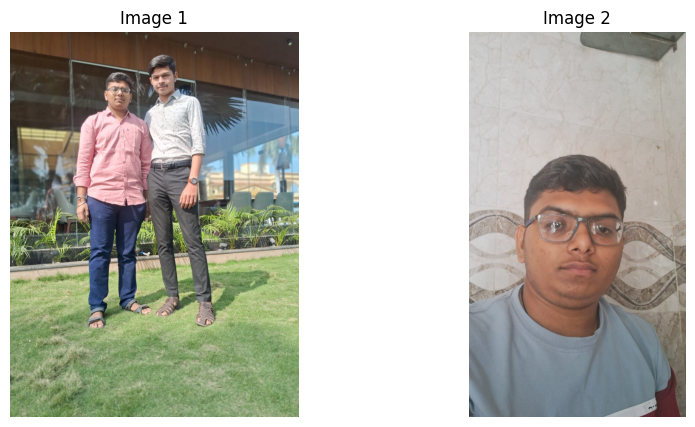

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image1_rgb)
axes[0].set_title("Image 1")
axes[0].axis("off")

axes[1].imshow(image2_rgb)
axes[1].set_title("Image 2")
axes[1].axis("off")

plt.show()


In [11]:
if landmarks1 and landmarks2:
    feature_similarities = compare_facial_features(landmarks1, landmarks2)
    print("Feature-wise Similarity:")
    for feature, score in feature_similarities.items():
        print(f"{feature}: {score}%")
else:
    print("Face not detected in one or both images.")

Feature-wise Similarity:
left_eye: 0%
right_eye: 3.23%
nose_bridge: 0%
top_lip: 0%
bottom_lip: 0%
left_eyebrow: 2.22%
right_eyebrow: 9.92%


In [12]:
# Compute Overall Face Similarity
encodings1 = face_recognition.face_encodings(image1_rgb)
encodings2 = face_recognition.face_encodings(image2_rgb)

if encodings1 and encodings2:
    overall_similarity = compute_overall_similarity(encodings1, encodings2)
    print(f"Overall Face Similarity: {overall_similarity}%")
else:
    print("Unable to compute overall similarity due to missing encodings.")


Overall Face Similarity: 0%
